# SUPERVISED LEARNING: LINEAR REGRESSION MODELS

## BASİT DOĞRUSAL REGRESYON 

<d><i>y</i><sub>i</sub> = <d><i>b</i><sub>0</sub> + <d><i>b</i><sub>1</sub><d><i>x</i><sub>i</sub> + <d><i>e</i><sub>i</sub>

<d><i>y</i><sub>i</sub> = Tahmin edilen değer
    
<d><i>b</i><sub>0</sub> = Doğrunun y-eksenini kestiği yer ve regresyon sabiti
    
<d><i>b</i><sub>1</sub> = Doğrunun eğimi veya regresyon katsayısı
    
<d><i>e</i><sub>i</sub> = Rastgele hata değeri

In [1]:
import pandas as pd

df = pd.read_csv("advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
from sklearn.model_selection import train_test_split

X = df[["radio"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X, y)

In [4]:
y_predicted = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

print("Doğrusal Regresyon Denklemi:{0:.4f} + X*{1:.4f}".format(model.intercept_,model.coef_[0]))
print("TEST VERİ SETİNDEKİ ORTALAMA KARE HATA: {0:.4f}".format(mean_squared_error(y_test, y_predicted)))
print("TEST VERİ SETİNDEKİ BAĞIMSIZ DEĞİŞKENİN BAĞIMLI DEĞİŞKENİ AÇIKLAMA ORANI: {0:.4f}".format(r2_score(y_test, y_predicted)))

Doğrusal Regresyon Denklemi:9.3116 + X*0.2025
TEST VERİ SETİNDEKİ ORTALAMA KARE HATA: 23.0210
TEST VERİ SETİNDEKİ BAĞIMSIZ DEĞİŞKENİN BAĞIMLI DEĞİŞKENİ AÇIKLAMA ORANI: 0.2706


In [6]:
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse


def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w



def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


df = pd.read_csv("advertising.csv")

X = df["radio"]
Y = df["sales"]


learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 1000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
After 1000 iterations b = 2.343098266484275, w = 0.41573597707268284, mse = 32.09637512179127


# Polinomal Lineer Regresyon

In [7]:
X = df[["radio"]]
y = df["sales"]

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pr = PolynomialFeatures(degree=5)
X_train_polynomial = pr.fit_transform(X)

lr = LinearRegression()
model = lr.fit(X_train_polynomial,y)

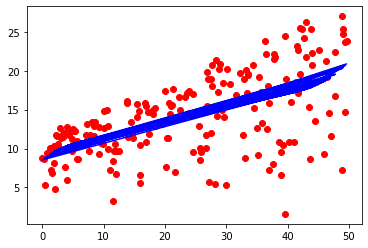

In [9]:
import matplotlib.pyplot as plt 

plt.scatter(X,y,color = 'red') 
plt.plot(X,lr.predict(X_train_polynomial), color = 'blue') 
plt.show()

# ÇOKLU DOĞRUSAL REGRESYON

In [10]:
import pandas as pd

df = pd.read_csv("advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [13]:
y_predicted = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print("Doğrusal Regresyon Denklemi: {0:.4f} + TV_DEĞERİ*{1:.4f} + RADİO_DEĞERİ*{2:.4f} + GAZETE_DEĞERİ*{3:.4f}".format(model.intercept_,model.coef_[0],model.coef_[1],model.coef_[2]))
print("TEST VERİ SETİNDEKİ ORTALAMA KARE HATA: {0:.4f}".format(mean_squared_error(y_test, y_predicted)))
print("TEST VERİ SETİNDEKİ BAĞIMSIZ DEĞİŞKENİN BAĞIMLI DEĞİŞKENİ AÇIKLAMA ORANI: {0:.4f}".format(r2_score(y_test, y_predicted)))

Doğrusal Regresyon Denklemi: 2.9791 + TV_DEĞERİ*0.0447 + RADİO_DEĞERİ*0.1892 + GAZETE_DEĞERİ*0.0028
TEST VERİ SETİNDEKİ ORTALAMA KARE HATA: 3.1741
TEST VERİ SETİNDEKİ BAĞIMSIZ DEĞİŞKENİN BAĞIMLI DEĞİŞKENİ AÇIKLAMA ORANI: 0.8994


In [15]:
from sklearn.model_selection import cross_val_score

X = df.drop("sales", axis = 1)
y = df["sales"]

cross_val_score(model, X, y, cv = 5, scoring = "r2").mean()

0.8871063495438435

# TEMEL BİLEŞEN REGRESYONU (PCR)

In [16]:
df = pd.read_csv("hitters.csv")
df = df.dropna()


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["League"] = le.fit_transform(df["League"])
df["Division"] = le.fit_transform(df["Division"])
df["NewLeague"] = le.fit_transform(df["NewLeague"])


df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))

In [19]:
import numpy as np

np.cumsum(np.round(pca.explained_variance_ratio_ , decimals = 4)*100)

array([ 38.73,  60.  ,  70.89,  79.06,  84.31,  88.55,  92.11,  94.86,
        96.35,  97.3 ,  98.03,  98.7 ,  99.18,  99.49,  99.75,  99.91,
        99.97,  99.99, 100.  ])

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

pcr_model = lr.fit(X_reduced_train, y_train)

In [21]:
pca_test = PCA()
X_reduced_test = pca_test.fit_transform(scale(X_test))

In [22]:
y_predicted_test = pcr_model.predict(X_reduced_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

print("TEST VERİ SETİNDEKİ ORTALAMA KARE HATA: {0:.4f}".format(np.sqrt(mean_squared_error(y_test, y_predicted_test))))
print("TEST VERİ SETİNDEKİ BAĞIMSIZ DEĞİŞKENİN BAĞIMLI DEĞİŞKENİ AÇIKLAMA ORANI: {0:.4f}".format(r2_score(y_test, y_predicted_test)))


TEST VERİ SETİNDEKİ ORTALAMA KARE HATA: 420.9294
TEST VERİ SETİNDEKİ BAĞIMSIZ DEĞİŞKENİN BAĞIMLI DEĞİŞKENİ AÇIKLAMA ORANI: 0.0204


In [24]:
from sklearn import model_selection

cv_10 = model_selection.KFold(n_splits=10,
                             shuffle=True,
                             random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [26]:
RMSE = []

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lr, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

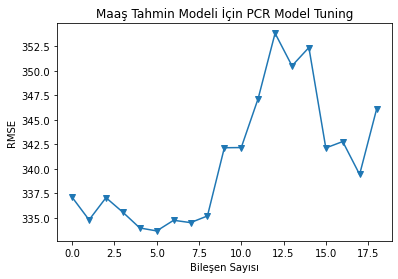

In [27]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [29]:
pcr_final = lr.fit(X_reduced_train[:,0:5], y_train)

In [30]:
y_pred = pcr_final.predict(X_reduced_test[:,0:5])

print(np.sqrt(mean_squared_error(y_test, y_pred)))

405.15612061524547


# KISMİ EN KÜÇÜK KARELER REGRESYONU(PLS)

In [31]:
df = pd.read_csv("hitters.csv")
df = df.dropna()


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["League"] = le.fit_transform(df["League"])
df["Division"] = le.fit_transform(df["Division"])
df["NewLeague"] = le.fit_transform(df["NewLeague"])


df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


In [32]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

pls = PLSRegression().fit(X_train,y_train)

In [34]:
y_pred = pls.predict(X_test)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.78867682402495

In [36]:
from sklearn import model_selection

cv_10 = model_selection.KFold(n_splits=10,
                             shuffle=True,
                             random_state=1)

In [37]:
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

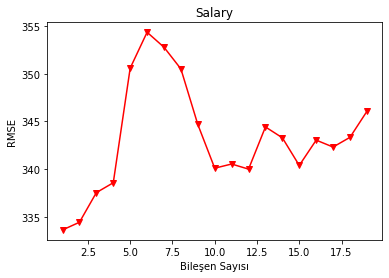

In [38]:
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [39]:
pls_final = PLSRegression(n_components = 2).fit(X_train, y_train)

In [40]:
y_pred = pls_final.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.78867682402495

# RİDGE REGRESYON

In [42]:
df = pd.read_csv("hitters.csv")
df = df.dropna()


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["League"] = le.fit_transform(df["League"])
df["Division"] = le.fit_transform(df["Division"])
df["NewLeague"] = le.fit_transform(df["NewLeague"])


df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


In [43]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

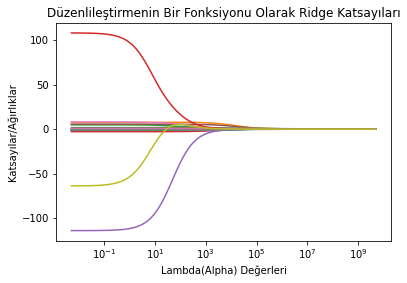

In [45]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 
plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

# LASSO REGRESYON (L1 REGULARIZATION)

In [46]:
df = pd.read_csv("hitters.csv")
df = df.dropna()


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["League"] = le.fit_transform(df["League"])
df["Division"] = le.fit_transform(df["Division"])
df["NewLeague"] = le.fit_transform(df["NewLeague"])


df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


In [47]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.919e+03, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.129e+03, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+04, tolerance: 4.367e+03
  model = cd_fast.enet_coo

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.944e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.944e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.944e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coo

Text(0, 0.5, 'weights')

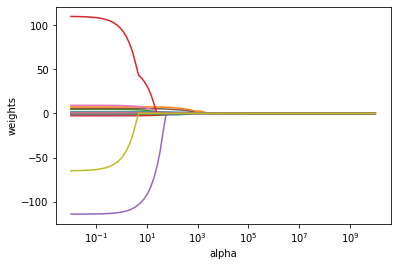

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [49]:
y_pred = lasso.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred))

358.79241805341934

In [51]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [52]:
lasso_cv_model.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=10000, normalize=True)

In [53]:
lasso_final = Lasso(alpha = lasso_cv_model.alpha_)

In [54]:
lasso_final.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.945e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1236113519442907)

In [55]:
y_pred = lasso_final.predict(X_test)

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

358.60413592894514

# ELASTICNET REGRESYONU

In [57]:
df = pd.read_csv("hitters.csv")
df = df.dropna()


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["League"] = le.fit_transform(df["League"])
df["Division"] = le.fit_transform(df["Division"])
df["NewLeague"] = le.fit_transform(df["NewLeague"])


df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


In [58]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet().fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.220e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


In [60]:
y_pred = enet_model.predict(X_test)

In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.78779265923316

In [62]:
from sklearn.linear_model import ElasticNetCV

enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [63]:
enet_final = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [64]:
y_pred = enet_final.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

378.23482159854785